In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
sns.set_style('darkgrid')

# Expected Values

Expected values characterize a distribution. The most useful expected value, the **mean**, characterizes the center of a density or mass function. Another expected value summary, the **variance**, characterizes how spread out a density is. Yet another expected value calculation is the **skewness**, which considers how much a density is pulled toward high or low values. In this notebook we are discussing population quantities. It is convenient (and of course by design) that the names for all of the sample analogs estimate the associated population quantity. So, for example, the sample or empirical mean estimates the population mean; the sample variance estimates the population variance and the sample skewness estimates the population skewness.

## The population mean for discrete random variables

The **expected value** or (population) **mean** of a random variable is the center of its distribution. For discrete random variable $X$ with PMF $p(x)$, it is defined as follows:

$$
E[X] = \sum_{x}xp(x)
$$

where the sum is taken over the possible values of $x$. Where did they get this idea from? It’s taken from the physical idea of the center of mass. Specifically, $E[X]$ represents the center of mass of a collection of locations and weights, $\{x, p(x)\}$. We can exploit this fact to quickly calculate population means for distributions where the center of mass is obvious.

## The Sample Mean

It is important to contrast the population mean (the estimand) with the sample mean (the estimator). ***The sample mean estimates the population mean***. Not coincidentally, since the population mean is the center of mass of the population distribution, the sample mean is the center of mass of the data. In fact, it’s exactly the same equation:

$$
\bar{X} = \sum_{i=1}^{n}x_{i}p(x_{i})
$$

where $p(x_{i}) = 1/n$

### Example: Find the center of mass of the bars

Let’s go through an example of illustrating how the sample mean is the center of mass of observed data. Below we plot Galton’s fathers and sons data

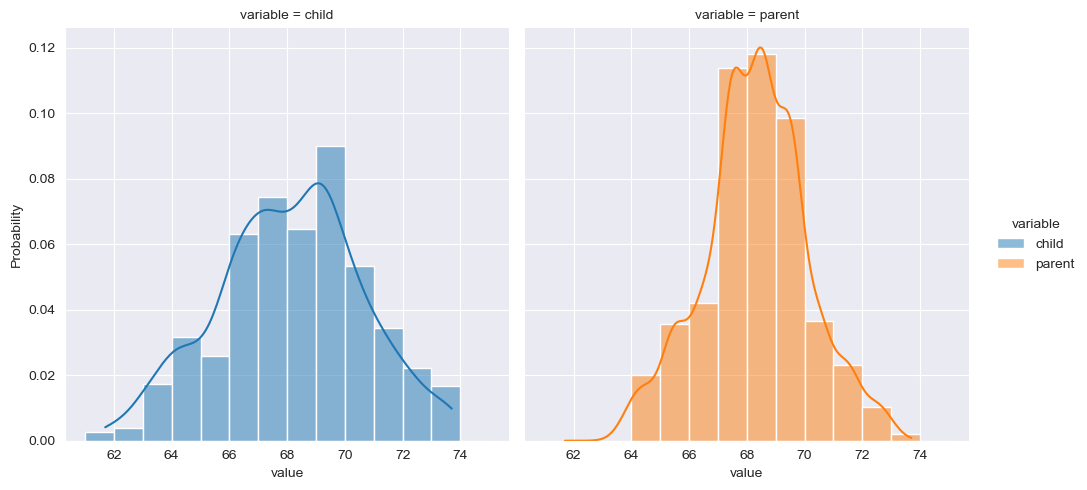

In [2]:
df_galton = pd.read_csv('./data/galton.csv')
df_melt = df_galton.melt(value_vars=['child', 'parent'])

sns.displot(
    df_melt,
    x = 'value',
    col = 'variable',
    binwidth=1,
    binrange=(61,75),
    hue = 'variable',
    stat = "probability",
    kde = True
);

Let's examine the point that balances out the histogram and we will find that is the empirical mean. To compute the point of balance, we can estimate the Mean Square Error. For each point of balance $\mu_{i}$, the Mean Error is the mean of the squared difference between each data point (e.g. child heights) and the point of balance $\overline{(x_{i} - \mu)^{2}}$.

In [3]:
mu = np.arange(60, 75, 0.5)
point_of_balance = []
mse = []

for m in mu:
    point_of_balance.append(m)
    mse.append(np.round(np.mean((df_galton['child'] - m)**2), 3))
    print("point of balance: {}, mse: {}".format(np.round(m,1), np.round(np.mean((df_galton['child'] - m)**2), 3)))

point of balance: 60.0, mse: 71.757
point of balance: 60.5, mse: 63.918
point of balance: 61.0, mse: 56.58
point of balance: 61.5, mse: 49.741
point of balance: 62.0, mse: 43.403
point of balance: 62.5, mse: 37.564
point of balance: 63.0, mse: 32.226
point of balance: 63.5, mse: 27.387
point of balance: 64.0, mse: 23.049
point of balance: 64.5, mse: 19.21
point of balance: 65.0, mse: 15.872
point of balance: 65.5, mse: 13.033
point of balance: 66.0, mse: 10.695
point of balance: 66.5, mse: 8.856
point of balance: 67.0, mse: 7.518
point of balance: 67.5, mse: 6.679
point of balance: 68.0, mse: 6.341
point of balance: 68.5, mse: 6.503
point of balance: 69.0, mse: 7.164
point of balance: 69.5, mse: 8.326
point of balance: 70.0, mse: 9.987
point of balance: 70.5, mse: 12.149
point of balance: 71.0, mse: 14.81
point of balance: 71.5, mse: 17.972
point of balance: 72.0, mse: 21.633
point of balance: 72.5, mse: 25.795
point of balance: 73.0, mse: 30.456
point of balance: 73.5, mse: 35.618
poi

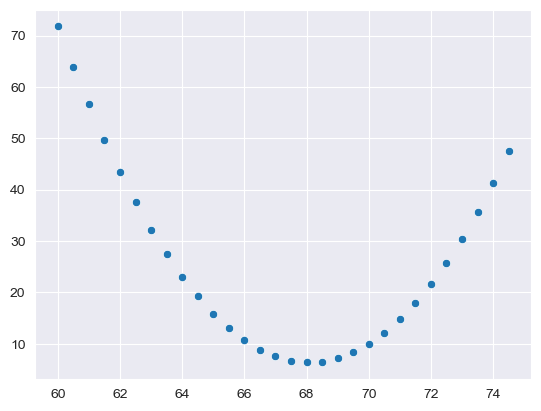

In [4]:
sns.scatterplot(
    x = np.array(point_of_balance),
    y = np.array(mse)
);

The table and the plot show that the point of balance minimising the MSE can be found at $68.0$ which is the empirical mean.

If the bars of the histogram are from the observed data, the point that balances it out is the empirical mean; if the bars are the true population probabilities (which we don’t know of course) then the point is the population mean. Let’s now go through some examples of mathematically calculating the population mean.

## The center of mass is the empirical mean

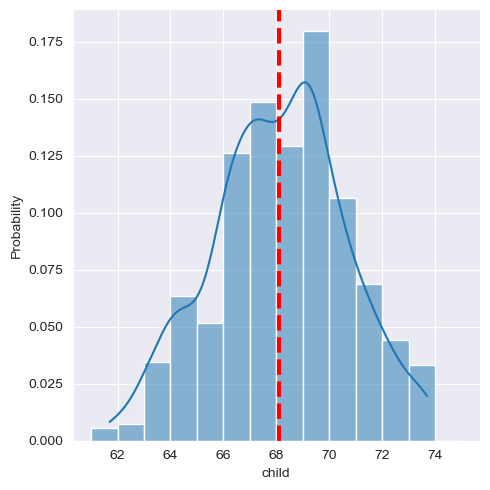

In [5]:
rcParams["figure.figsize"] = (10,5)

sns.displot(
    df_galton,
    x = 'child',
    binwidth=1,
    binrange=(61,75),
    stat = "probability",
    kde = True
);

plt.axvline(x = df_galton['child'].mean(), color = 'red', lw = 3, ls = '--');

## Example of a population mean, a fair coin

Suppose a coin is flipped and $X$ is declared 0 or 1 corresponding to a `Head` or a `Tail`, respectively. What is the expected value of $X$?

$$
E[X] = 0.5 \times 0 + 0.5 \times 1 = 0.5
$$

Note, if thought about geometrically, this answer is obvious; if two equal weights are spaced at 0 and 1, the center of mass will be 0.5.

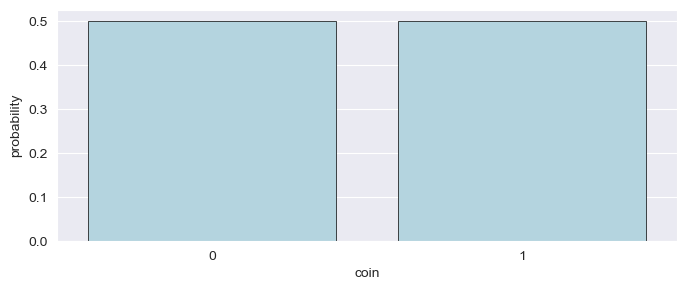

In [6]:
rcParams["figure.figsize"] = (8,3)
sns.set_style('darkgrid')
df_fair_coin = pd.DataFrame(
    {'coin': [0, 1],
    'probability': np.array([0.5, 0.5])}
)

sns.barplot(
    df_fair_coin,
    x = 'coin',
    y = 'probability',
    color = 'lightblue',
    linewidth=0.5, edgecolor="black"
);

plt.xticks([0,1]);

## What about a biased coin?

Suppose that a random variable, $X$, is so that $P(X = 1) = p$ and $P(X = 0) = (1 − p)$ (This is a biased coin when $p \neq 0.5$) What is its expected value?

$$
E[X] = 0 \times (1-p) + 1 \times p = p
$$

Notice that the expected value isn’t a value that the coin can take in the same way that the sample proportion of heads will also likely be neither 0 nor 1. This coin example is not exactly trivial as it serves as the basis for a random sample of any population for a binary trait. So, we might model the answer from an election polling question as if it were a coin flip.

## Example Die Roll

Suppose that a die is rolled and $X$ is the number face up. What is the expected value of $X$?

$$
E[X] = 1 \times \frac{1}{6} + 2 \times \frac{1}{6} + 3 \times \frac{1}{6} + 4 \times \frac{1}{6} + 5 \times \frac{1}{6} + 6 \times \frac{1}{6} = 3.5
$$

Again, the geometric argument makes this answer obvious without calculation.

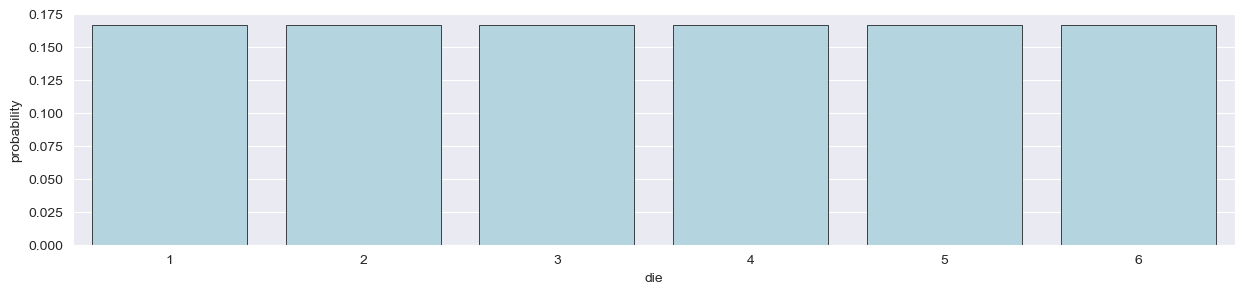

In [7]:
rcParams["figure.figsize"] = (15,3)

df_fair_die = pd.DataFrame(
    {'die': ['1', '2', '3', '4', '5', '6'],
    'probability': np.full(6, 1/6)}
)

sns.barplot(
    df_fair_die,
    x = 'die',
    y = 'probability',
    color = 'lightblue',
    linewidth=0.5, edgecolor="black"
);



## Continuous random variables 

For a continuous random variable, $X$, with density, $f$, the expected value is again exactly the center of mass of the density. Think of it like cutting the continuous density out of a thick piece of wood and trying to find the point where it balances out.

### Example

Consider a density where $f(x) = 1$ for $x$ between zero and one. Suppose that $X$ follows this density; what is its expected value? The answer is clear since the density looks like a box, it would balance out exactly in the middle, 0.5.

## Facts about expected values

Recall that expected values are properties of population distributions. The expected value, or mean, height is the center of the population density of heights. Of course, the average of ten randomly sampled people’s height is itself a random variable, in the same way that the average of ten die rolls is itself a random number. Thus, the distribution of heights gives rise to the distribution of averages of ten heights in the same way that distribution associated with a die roll gives rise to the distribution of the average of ten dice.

An important question to ask is: 

> “What does the distribution of averages look like?” 

This question is important, since it tells us things about averages, the best way to estimate the population mean, when we only get to observe one average. Consider the die rolls again. If wanted to know the distribution of averages of 100 die rolls, you could (at least in principle) roll 100 dice, take the average and repeat that process. Imagine, if you could only roll the 100 dice once. Then we would have direct information about the distribution of die rolls (since we have 100 of them), but we wouldn’t have any direct information about the distribution of the average of 100 die rolls, since we only observed one average. 

Fortunately, the mathematics tells us about that distribution. Notably, it’s centered at the same spot as the original distribution! Thus, the distribution of the estimator (the sample mean) is centered at the distribution of what it’s estimating (the population mean). When the expected value of an estimator is what its trying to estimate, we say that ***the estimator is unbiased***. Let’s go through several simulation experiments to see this more fully.

## Simulation experiments

### Standard normals

Consider simulating a lot of standard normals and plotting a histogram (the blue density). Now consider simulating lots of averages of 10 standard normals and plotting their histogram (the salmon colored density). Notice that they’re centered in the same spot! It’s also more concentrated around that point. 

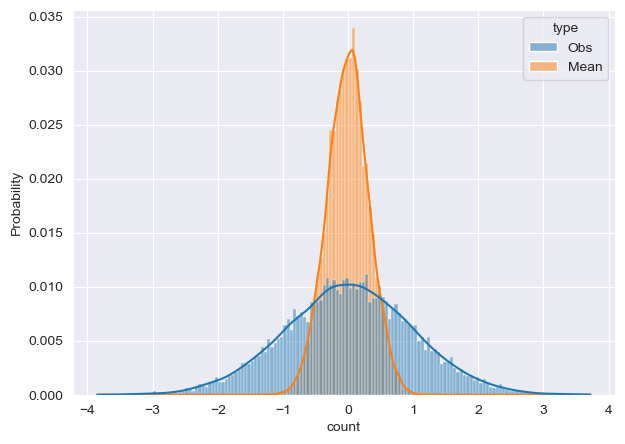

In [8]:
rcParams["figure.figsize"] = (7,5)

n_samples = 10000
normal_samples = np.random.normal(size = n_samples,
                                  loc = 0.0,
                                  scale = 1.0)

# rcParams["figure.figsize"] = (5,5)

# sns.histplot(
#     x = normal_samples,
#     stat = "probability",
    
# );

n_experiments = n_samples
n_of_normals = 10

means = []
for mean in np.arange(0, n_experiments):
    draw = np.random.normal(size = n_of_normals,
                        loc = 0.0,
                        scale = 1.0)
    means.append(draw.mean())

# sns.histplot(
#     x = np.array(means),
#     stat = "probability",
    
# );

df_experiment_vs_mean = pd.concat(
    [pd.DataFrame({
        'count' : normal_samples,
        'type' : 'Obs'
    }),
     pd.DataFrame({
         'count' : np.array(means),
         'type' : 'Mean'
     })],
    axis=0
)

sns.histplot(
    data = df_experiment_vs_mean,
    x = 'count',
    stat="probability",
    hue = 'type',
    kde = True
);

## Averages of x die rolls 

Consider rolling a die a lot of times and taking a histogram of the result.

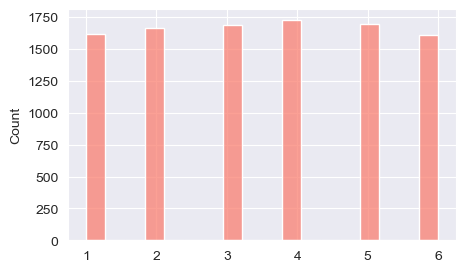

In [9]:
rcParams["figure.figsize"] = (5,3)

n_of_rolls = 10000

results = np.random.choice(np.arange(1,7),
                size = n_of_rolls,
                replace = True)

sns.histplot(
    x = results,
    color = 'salmon',
);

plt.xticks(np.arange(1,7));

The bars are equally distributed at the six possible outcomes and thus the histogram is centered around 3.5.

Now consider simulating lots of averages of 2 dice. Its histogram is also centered at 3.5. So is it for 3 and 4. Notice also the distribution gets increasing Gaussian looking (like a bell curve) and increasingly concentrated around 3.5.

<Figure size 100x500 with 0 Axes>

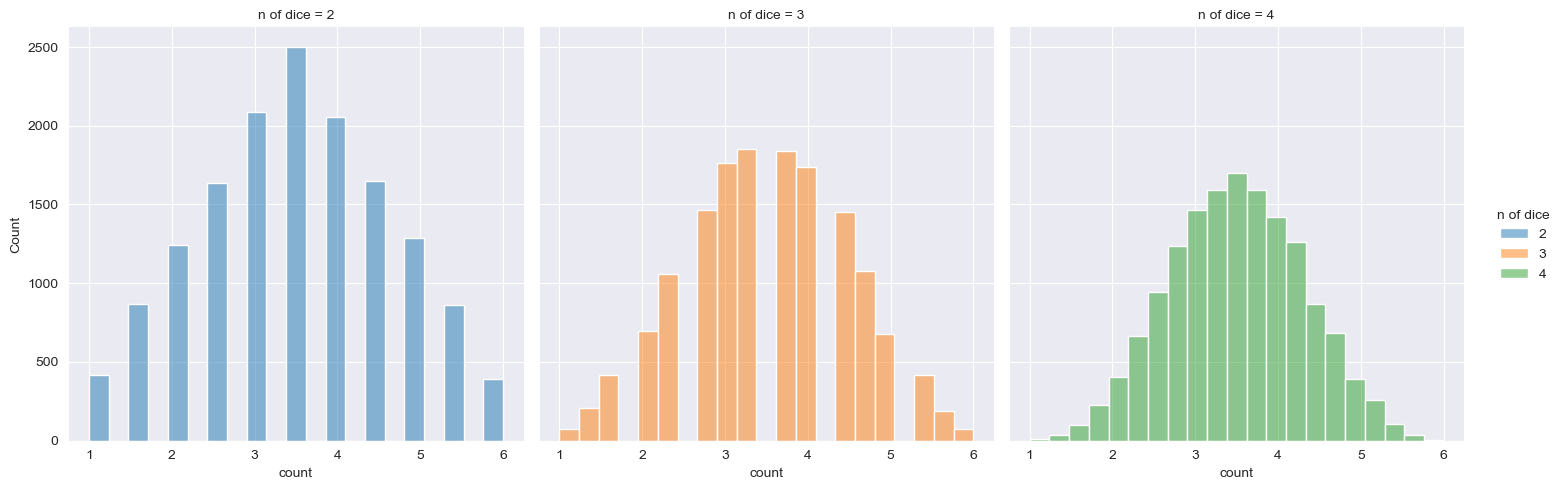

In [21]:
n_of_dice = [2,3,4]
n_of_experiments = 15000
df_experiment = pd.DataFrame(columns=['count', 'n of dice'])
#means = []

for die in n_of_dice:
    means = []
    for i in np.arange(0,n_of_experiments):
        means.append(np.random.choice(np.arange(1, 7),
                                  size = die,
                                  replace = True).mean())
    df_means = pd.DataFrame({'count' : means, 'n of dice': str(die)})
    df_experiment=pd.concat([df_experiment, df_means])
    
# rcParams["figure.figsize"] = (8,5)
plt.figure(figsize=(1,5));

sns.displot(
    df_experiment,
    x = 'count',
    col = 'n of dice',
    hue = 'n of dice',
    bins=21
);
plt.xticks(np.arange(1,7));

## Averages of $x$ coin flips

For the coin flip simulation exactly the same occurs. All of the distributions are centered around 0.5.

<Figure size 100x500 with 0 Axes>

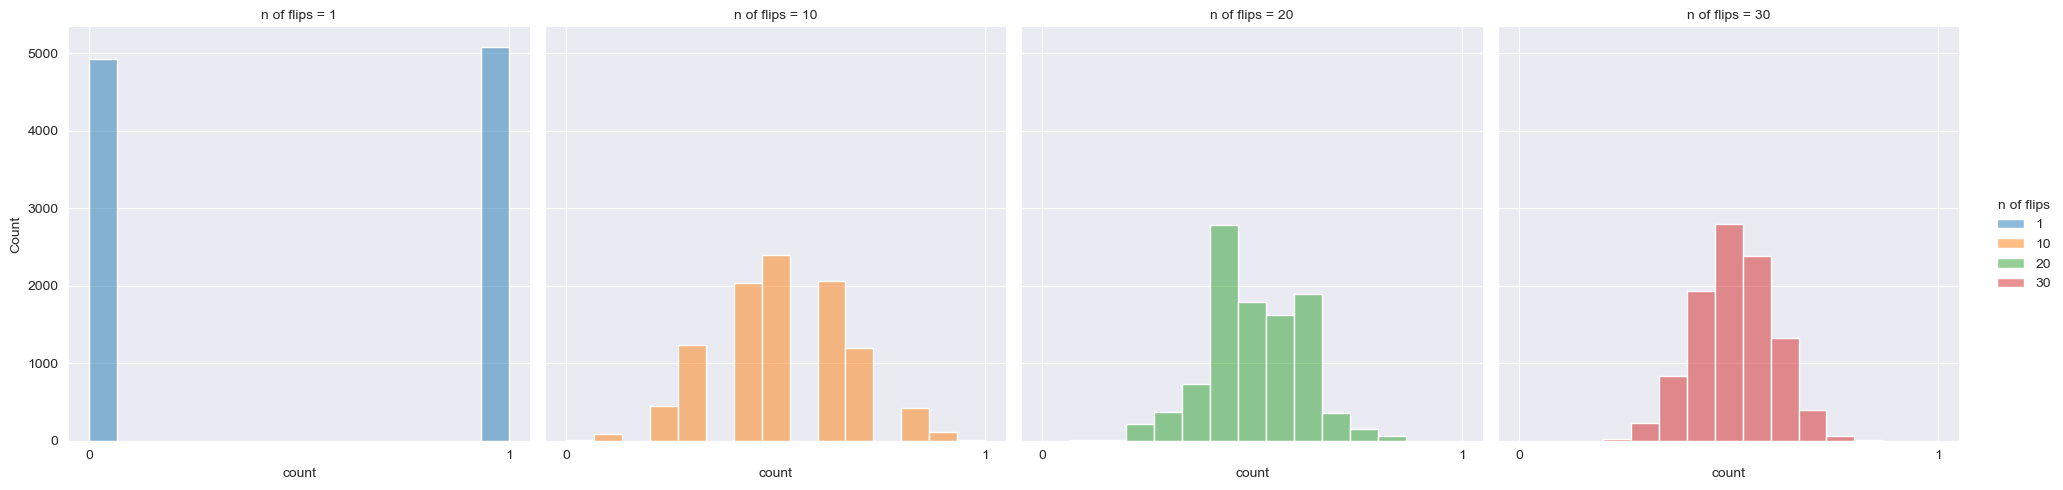

In [33]:
n_of_flips = [1,10,20,30]
n_of_experiments = 10000
df_experiment = pd.DataFrame(columns=['count', 'n of flips'])
#means = []

for flip in n_of_flips:
    means = []
    for i in np.arange(0,n_of_experiments):
        means.append(np.random.choice(np.arange(0, 2),
                                  size = flip,
                                  replace = True).mean())
    df_means = pd.DataFrame({'count' : means, 'n of flips': str(flip)})
    df_experiment=pd.concat([df_experiment, df_means])
    
# rcParams["figure.figsize"] = (8,5)
plt.figure(figsize=(1,5));

sns.displot(
    df_experiment,
    x = 'count',
    col = 'n of flips',
    hue = 'n of flips',
    bins=15
);
plt.xticks(np.arange(0,2));

## Summary notes

- Expected values are properties of distributions.
- The population mean is the center of mass of population.
- The sample mean is the center of mass of the observed data.
- The sample mean is an estimate of the population mean.
- The sample mean is unbiased: the population mean of its distribution is the mean that it’s trying to estimate.
- The more data that goes into the sample mean, the more. concentrated its density / mass function is around the population mean.

In [11]:
n_of_dice = [2,3,4]
n_of_experiments = 15000
df_experiment = pd.DataFrame(columns=['count', 'n of dice'])
#means = []

for die in n_of_dice:
    means = []
    for i in np.arange(0,n_of_experiments):
        means.append(np.random.choice(np.arange(1, 7),
                                  size = die,
                                  replace = True).mean())
    df_means = pd.DataFrame({'count' : means, 'n of dice': str(die)})
    df_experiment=pd.concat([df_experiment, df_means])
    

                 

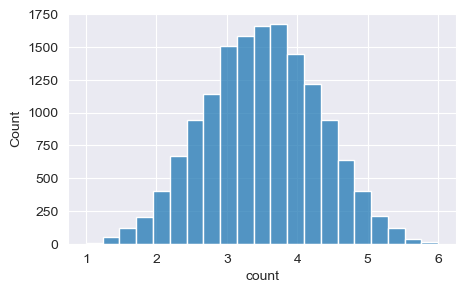

In [12]:
sns.histplot(
    data=df_experiment[df_experiment['n of dice'] == '4'],
    x = 'count',
    bins=21
)
plt.xticks(np.arange(1,7));

<Figure size 500x500 with 0 Axes>

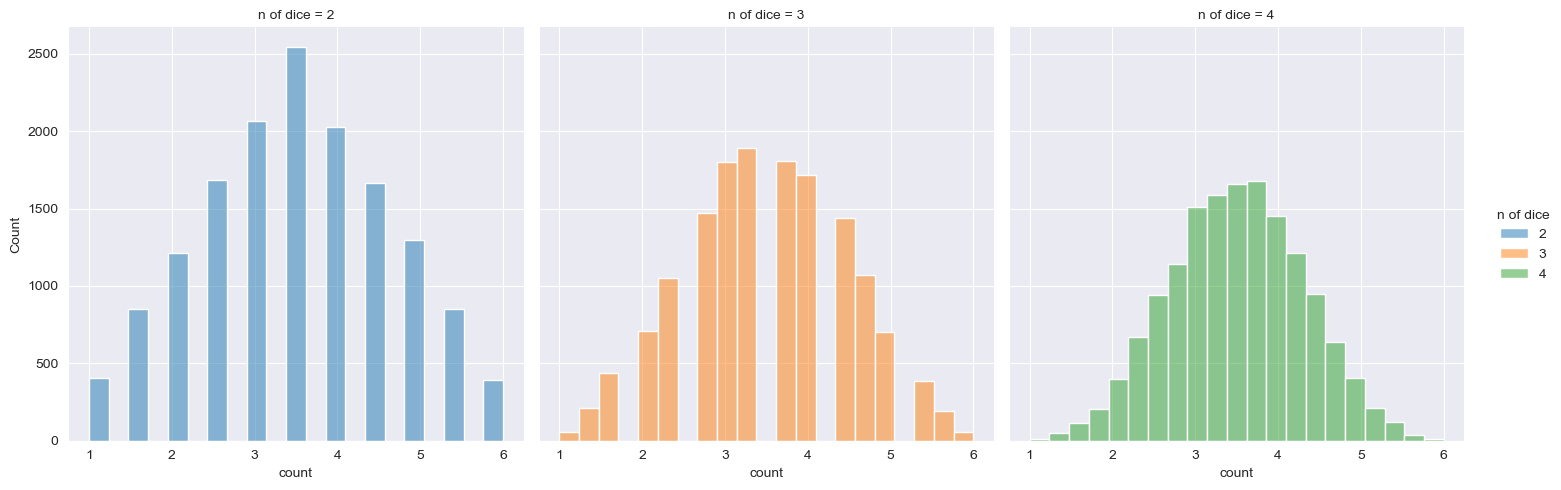

In [13]:
# rcParams["figure.figsize"] = (8,5)
plt.figure(figsize=(5,5))

sns.displot(
    df_experiment,
    x = 'count',
    col = 'n of dice',
    hue = 'n of dice',
    bins=21
)
plt.xticks(np.arange(1,7));

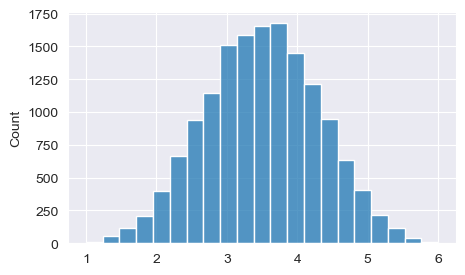

In [14]:
sns.histplot(
    x = means,
    bins=21
)
plt.xticks(np.arange(1,7));

In [15]:
means[:20]

[2.5,
 4.0,
 3.5,
 3.0,
 2.25,
 4.0,
 3.0,
 3.25,
 3.25,
 5.0,
 3.0,
 3.75,
 4.75,
 3.75,
 3.5,
 3.75,
 2.25,
 4.0,
 3.0,
 3.75]

In [16]:
n_experiments = n_samples
n_of_normals = 10

means = []
for mean in np.arange(0, n_experiments):
    draw = np.random.normal(size = n_of_normals,
                        loc = 0.0,
                        scale = 1.0)
    means.append(draw.mean())

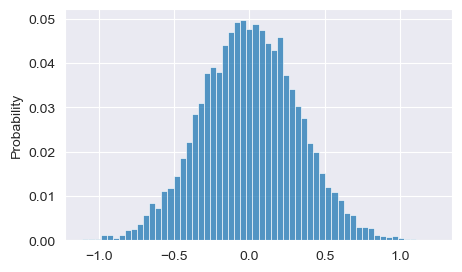

In [17]:
sns.histplot(
    x = np.array(means),
    stat = "probability",
    
);

In [18]:
len(normal_samples)

10000

In [19]:
len(np.array(means))

10000